In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
loan=pd.read_csv(r"C:\Users\ankit\Desktop\Great learning\udemy\Machine learning\Refactored_Py_DS_ML_Bootcamp-master\15-Decision-Trees-and-Random-Forests\loan_data.csv")

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
loan.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


In [8]:
loan.head(50)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
5,1,credit_card,0.0788,125.13,11.904968,16.98,727,6120.041667,50807,51.0,0,0,0,0
6,1,debt_consolidation,0.1496,194.02,10.714418,4.00,667,3180.041667,3839,76.8,0,0,1,1
7,1,all_other,0.1114,131.22,11.002100,11.08,722,5116.000000,24220,68.6,0,0,0,1
8,1,home_improvement,0.1134,87.19,11.407565,17.25,682,3989.000000,69909,51.1,1,0,0,0
9,1,debt_consolidation,0.1221,84.12,10.203592,10.00,707,2730.041667,5630,23.0,1,0,0,0


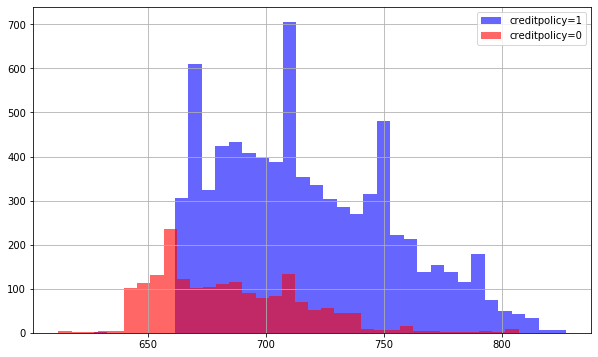

In [16]:
plt.figure(figsize=(10,6))
loan[loan['credit.policy']==1]["fico"].hist(bins=35,color='blue',label='creditpolicy=1',alpha=0.6)
loan[loan['credit.policy']==0]["fico"].hist(bins=35,color='red',label='creditpolicy=0',alpha=0.6)
plt.legend()
plt.show()

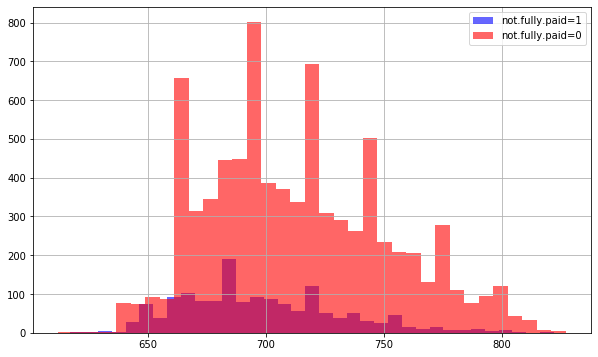

In [21]:
plt.figure(figsize=(10,6))
loan[loan['not.fully.paid']==1]["fico"].hist(bins=35,color='blue',label='not.fully.paid=1',alpha=0.6)
loan[loan['not.fully.paid']==0]["fico"].hist(bins=35,color='red',label='not.fully.paid=0',alpha=0.6)
plt.legend()
plt.show()

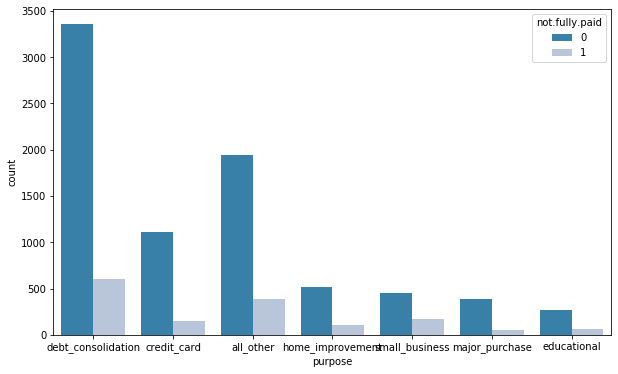

In [33]:
plt.figure(figsize=(10,6))
sns.countplot(x='purpose',hue='not.fully.paid',data=loan,palette="PuBu_r")

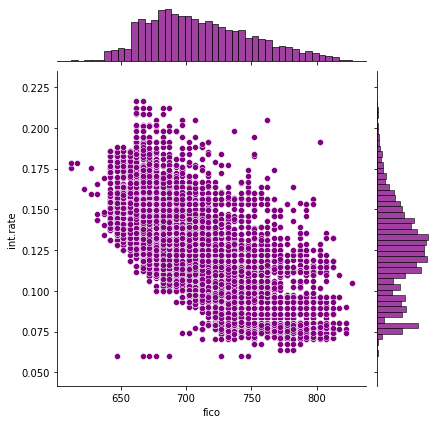

In [23]:
sns.jointplot(x='fico',y='int.rate',data=loan,color="purple")

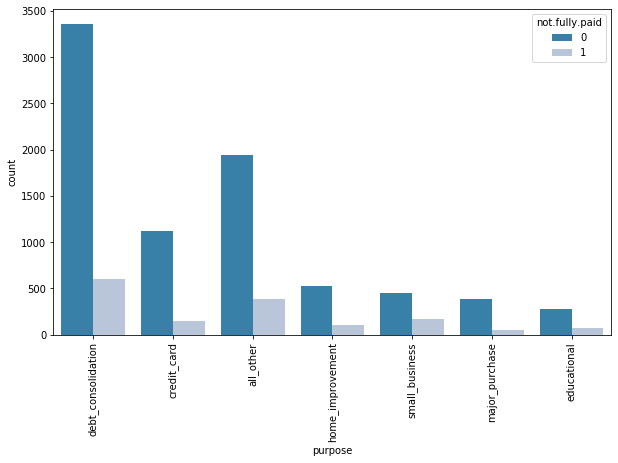

In [37]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.countplot(x='purpose',hue='not.fully.paid',data=loan,palette="PuBu_r")

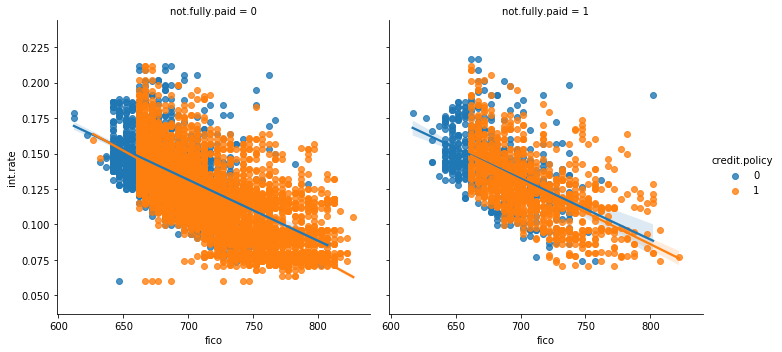

In [36]:
sns.lmplot(y='int.rate',x='fico',hue='credit.policy',col='not.fully.paid',data=loan)

In [44]:
final_data=pd.get_dummies(data=loan,columns=['purpose'],drop_first=True)

In [46]:
from sklearn.model_selection import train_test_split

In [52]:
X=final_data.drop('credit.policy',axis=1)
y=final_data['credit.policy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
model=DecisionTreeClassifier()

In [55]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [56]:
pred=model.predict(X_test)

In [57]:
pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [58]:
from sklearn.metrics import classification_report,confusion_matrix

In [59]:
print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       551
           1       0.99      0.99      0.99      2323

    accuracy                           0.99      2874
   macro avg       0.98      0.98      0.98      2874
weighted avg       0.99      0.99      0.99      2874

[[ 538   13]
 [  16 2307]]


In [60]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
model=RandomForestClassifier(n_estimators=275)

model.fit(X_train,y_train)

pred=model.predict(X_test)

pred

from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.98      0.94      0.96       551
           1       0.99      1.00      0.99      2323

    accuracy                           0.99      2874
   macro avg       0.99      0.97      0.98      2874
weighted avg       0.99      0.99      0.99      2874

[[ 518   33]
 [   8 2315]]
